<a id='Q0'></a>
<center> <h1> Crypto Project - Bitcoin Price Machine Learning Experiment </h1> </center>
<center> <h2 class="blue-text" style="color: blue"> Feature Engineering </h2> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>ZHAW CAS DAENG Group 4, 09 July 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#06065c10;border-top:0.01cm solid #53c653;border-bottom:0.01cm solid #53c653;color:#303030">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p><strong>Goal: </strong>Enhance dataset with domain-specific and seniment data ...</p>
        <p> <strong> Outline:</strong>
        <a id="P0" name="P0"></a>
        <ol>
            <li> <a href='#I'>Import Libraries & Setup Project Directory</a> </li>
            <li> <a href='#F'>Feature Engineering</a></li>
                <ol>
                    <li><a href='#f1'>Calculating Moving Averages</a></li>
                    <li><a href='#f2'>Calculating Technical Indicators</a></li>
                    <li><a href='#f3'>Inject other Signal Data</a></li>
                    <li><a href='#f4'>Inject Twitter Sentiment Data</a></li>
                </ol>
            <li> <a href='#M'>Merge & Cleanse Data</a></li>
            <li> <a href='#T'>Transform Dataset</a></li>
        </ol>
    </div>
</div>

<a id='I'></a>
## <font color='darkblue'>__Import Libraries__</font>

In [1]:
# General libraries
import os
import pathlib
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data manipulation and statistical libraries
import numpy as np
import pandas as pd
from math import ceil
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.compat import lzip

In [3]:
# Technical Analysis Library for Feature Engineering
from ta.trend import adx, macd

In [4]:
# Data visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
# Setup the project directory
workdir = pathlib.Path().absolute()
project_dir = workdir.parent
data_path = f"{project_dir}\\00_Data\\"
print(data_path)

C:\Users\akosr\CAS_DAENG\Modul_02\crypto_project_ML\00_Data\


<a id='F'></a>
## <font color='darkblue'>__Feature Engineering__</font>

In [6]:
df_orig = pd.read_csv(data_path+"btc_base_dataset.csv")

In [7]:
df_orig.head()

,Date,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,...,GCF,GSPC,IXIC,JPYUSDX,TSLA,VIX,XWDTO,Cost_per_TR,Num_TR_per_Block,Bu_Be_Spread_MA8
0,2014-01-20,842.949510,849.072500,821.0550,833.446473,835.942243,11975.316447,785.348449,783.908292,22.872593,...,1242.300049,1843.800049,4225.759766,0.009593,35.335999,12.870000,29.480682,49.638134,322.000000,0.195704
1,2014-01-21,831.520000,837.679998,817.1225,827.370000,826.970163,10513.698009,791.822038,786.008871,22.327713,...,1242.300049,1843.800049,4225.759766,0.009595,35.335999,12.870000,29.542688,49.918053,437.210843,0.194867
2,2014-01-22,826.172500,828.975360,809.1000,823.004997,820.873594,11156.353993,797.920394,787.709589,21.805205,...,1239.000000,1844.859985,4243.000000,0.009595,35.712002,12.840000,29.835018,57.155970,395.000000,0.194030
3,2014-01-23,821.977500,826.392248,808.4000,818.407242,817.501326,10317.039612,803.544392,789.162845,21.305850,...,1262.599976,1828.459961,4218.879883,0.009557,36.299999,13.770000,29.648994,57.137195,391.000000,0.193193
4,2014-01-24,816.457243,818.346068,773.5625,785.732912,794.962739,27248.760250,807.911633,789.445766,20.827381,...,1264.500000,1790.290039,4128.169922,0.009674,34.919998,18.139999,28.966900,60.419884,347.089947,0.190395


In [8]:
df_orig.shape

(2705, 35)

In [9]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2705 non-null   object 
 1   Open              2705 non-null   float64
 2   High              2705 non-null   float64
 3   Low               2705 non-null   float64
 4   Close             2705 non-null   float64
 5   WeightedPrice     2705 non-null   float64
 6   Volume            2705 non-null   float64
 7   SMA_30            2705 non-null   float64
 8   EMA_40            2705 non-null   float64
 9   Altcoin_EMA_40    2705 non-null   float64
 10  DASH              2705 non-null   float64
 11  DOGE              2705 non-null   float64
 12  ETC               2705 non-null   float64
 13  ETH               2705 non-null   float64
 14  LTC               2705 non-null   float64
 15  SC                2705 non-null   float64
 16  XEM               2705 non-null   float64


In [10]:
df_orig.isna().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
WeightedPrice       0
Volume              0
SMA_30              0
EMA_40              0
Altcoin_EMA_40      0
DASH                0
DOGE                0
ETC                 0
ETH                 0
LTC                 0
SC                  0
XEM                 0
XMR                 0
XRP                 0
ZEC                 0
Day_of_Week         0
CLF                 0
CNYUSDX             0
DJI                 0
EURUSDX             0
GCF                 0
GSPC                0
IXIC                0
JPYUSDX             0
TSLA                0
VIX                 0
XWDTO               0
Cost_per_TR         0
Num_TR_per_Block    0
Bu_Be_Spread_MA8    0
dtype: int64

<a id='f1'></a>
### <font color='darkblue'>__Calculating Moving Averages__</font>

In [11]:
df = df_orig.copy()

In [12]:
# Simple Moving Averages

df['SMA_05'] = df.loc[:,'WeightedPrice'].rolling(window=5).mean().fillna(method='bfill')
df['SMA_90'] = df.loc[:,'WeightedPrice'].rolling(window=90).mean().fillna(method='bfill')

In [13]:
# Exponential Moving Averages

df['EMA_05'] = df.loc[:,'WeightedPrice'].ewm(span=5, adjust=False).mean()
df['EMA_90'] = df.loc[:,'WeightedPrice'].ewm(span=90, adjust=False).mean()

In [14]:
df.tail()

,Date,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,...,TSLA,VIX,XWDTO,Cost_per_TR,Num_TR_per_Block,Bu_Be_Spread_MA8,SMA_05,SMA_90,EMA_05,EMA_90
2700,2021-06-12,37104.933029,37559.500193,34799.692441,35569.029140,35753.493286,10778.186253,38472.124745,41435.634904,1576.735029,...,609.890015,15.650000,66.029999,118.954072,2061.923810,0.235677,35591.092903,50515.541203,36086.501623,45168.987626
2701,2021-06-13,35497.344440,39386.806000,34863.308161,38990.891113,37256.995061,11648.552250,38039.479154,41231.798814,1567.456910,...,609.890015,15.650000,66.029999,118.954072,2061.923810,0.235677,36491.728170,50298.559778,36476.666103,44995.097679
2702,2021-06-14,39131.576470,41217.914272,38911.323770,40317.809757,39849.345933,16843.484717,37752.108636,41164.362088,1563.027969,...,617.690002,16.389999,66.169998,148.213136,1795.674074,0.235677,37439.271551,50130.730681,37600.892713,44882.004234
2703,2021-06-15,40778.389006,41397.273176,39535.582353,40430.161376,40538.098052,11650.539540,37555.002889,41133.812623,1560.343164,...,599.359985,17.020000,66.360001,142.499415,1846.267176,0.235677,38126.373383,49957.633595,38579.961159,44786.533769
2704,2021-06-16,40146.880857,40481.566200,38323.916827,38797.907985,39378.604957,824.726896,37399.444152,41048.192737,1557.477293,...,604.869995,18.150000,66.360001,142.499415,1846.267176,0.235677,38555.307458,49747.989841,38846.175758,44667.678190


<a id='f2'></a>
### <font color='darkblue'>__Calculating Technical Indicators__</font>

### Trend Indicators

In [15]:
# MACD: Moving Average Converge / Divergence
df['exp1'] = df['Close'].ewm(span=12, adjust=False).mean()
df['exp2'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['exp1'] - df['exp2']
df['exp3'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [16]:
df.dropna(inplace=True)

In [17]:
df.tail()

,Date,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,...,Num_TR_per_Block,Bu_Be_Spread_MA8,SMA_05,SMA_90,EMA_05,EMA_90,exp1,exp2,MACD,exp3
2700,2021-06-12,37104.933029,37559.500193,34799.692441,35569.029140,35753.493286,10778.186253,38472.124745,41435.634904,1576.735029,...,2061.923810,0.235677,35591.092903,50515.541203,36086.501623,45168.987626,36486.437491,38834.256814,-2347.819324,-2961.795567
2701,2021-06-13,35497.344440,39386.806000,34863.308161,38990.891113,37256.995061,11648.552250,38039.479154,41231.798814,1567.456910,...,2061.923810,0.235677,36491.728170,50298.559778,36476.666103,44995.097679,36871.738048,38845.859355,-1974.121307,-2764.260715
2702,2021-06-14,39131.576470,41217.914272,38911.323770,40317.809757,39849.345933,16843.484717,37752.108636,41164.362088,1563.027969,...,1795.674074,0.235677,37439.271551,50130.730681,37600.892713,44882.004234,37401.902926,38954.892718,-1552.989792,-2522.006531
2703,2021-06-15,40778.389006,41397.273176,39535.582353,40430.161376,40538.098052,11650.539540,37555.002889,41133.812623,1560.343164,...,1846.267176,0.235677,38126.373383,49957.633595,38579.961159,44786.533769,37867.788842,39064.171878,-1196.383036,-2256.881832
2704,2021-06-16,40146.880857,40481.566200,38323.916827,38797.907985,39378.604957,824.726896,37399.444152,41048.192737,1557.477293,...,1846.267176,0.235677,38555.307458,49747.989841,38846.175758,44667.678190,38010.884094,39044.448627,-1033.564532,-2012.218372


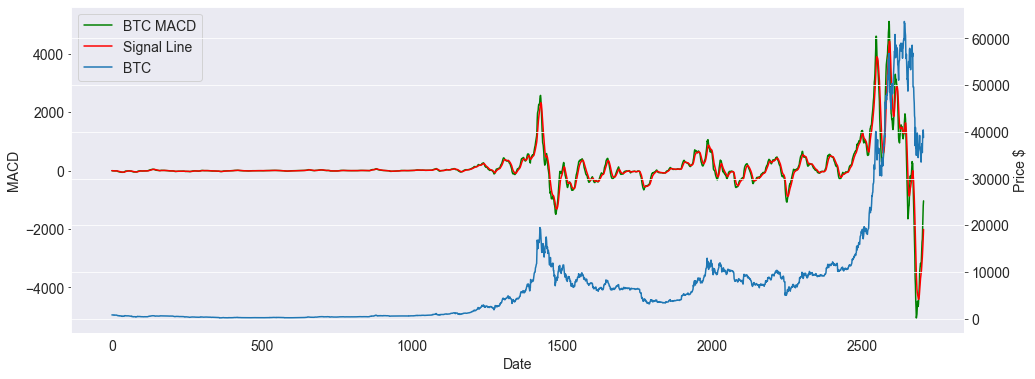

In [18]:
# Plot MACD
df['MACD'].plot(label='BTC MACD', color='g')
ax = df['exp3'].plot(label='Signal Line', color='r')
df['Close'].plot(ax=ax, secondary_y=True, label='BTC')

ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')
plt.show()

In [19]:
df.drop(columns=['exp1', 'exp2', 'exp3'], inplace=True)

In [20]:
# Average Directional Movement Index (ADX)
# Moving Average Convergence Divergence (MACD)

df['Avg_Dir_Mvmt'] = adx(df['High'], df['Low'], df['Close'], window=14)

### Momentum Indicators

In [21]:
# Awesome Oscillator
# Rate of Change (ROC) (Momentum)
# Relative Strength Index (RSI)
# Stochastic RSI
# True strength index (TSI)
# Ultimate Oscillator

from ta.momentum import rsi, awesome_oscillator, roc, stochrsi, ultimate_oscillator, tsi

df['RSI'] = rsi(df['Close'], window=14)
df['Awesome_Osc'] = awesome_oscillator(df['High'], df['Low'], window1=5, window2=34)
df['ROC'] = roc(df['Close'], window=10)
df['Stoch_RSI'] = stochrsi(df['Close'], window=14, smooth1=3, smooth2=3)
df['Ultimate_Osc'] = ultimate_oscillator(df['High'], df['Low'], df['Close'],
                                        window1=7, window2=14, window3=28,
                                        weight1=4.0, weight2=2.0, weight3=1.0)
df['True_SI'] = tsi(df['Close'], window_slow=25, window_fast=13)

In [22]:
from ta.others import cumulative_return, daily_log_return

df['Cum_Return'] = cumulative_return(df['Close'])
df['Log_Return'] = daily_log_return(df['Close'])

In [23]:
df.tail()

,Date,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,...,MACD,Avg_Dir_Mvmt,RSI,Awesome_Osc,ROC,Stoch_RSI,Ultimate_Osc,True_SI,Cum_Return,Log_Return
2700,2021-06-12,37104.933029,37559.500193,34799.692441,35569.029140,35753.493286,10778.186253,38472.124745,41435.634904,1576.735029,...,-2347.819324,50.611348,41.208244,-4692.578307,-5.614572,0.62888,54.452652,-20.485423,4167.704083,-5.248789
2701,2021-06-13,35497.344440,39386.806000,34863.308161,38990.891113,37256.995061,11648.552250,38039.479154,41231.798814,1567.456910,...,-1974.121307,48.852654,49.911395,-3247.375336,-0.672478,1.00000,60.803685,-17.353486,4578.271779,9.185277
2702,2021-06-14,39131.576470,41217.914272,38911.323770,40317.809757,39849.345933,16843.484717,37752.108636,41164.362088,1563.027969,...,-1552.989792,46.392808,52.827579,-1730.328459,9.283849,1.00000,65.017795,-13.827993,4737.480401,3.346524
2703,2021-06-15,40778.389006,41397.273176,39535.582353,40430.161376,40538.098052,11650.539540,37555.002889,41133.812623,1560.343164,...,-1196.383036,44.030225,53.076685,-673.406786,11.934587,1.00000,63.706402,-10.905706,4750.960765,0.278277
2704,2021-06-16,40146.880857,40481.566200,38323.916827,38797.907985,39378.604957,824.726896,37399.444152,41048.192737,1557.477293,...,-1033.564532,42.240530,49.026112,75.804169,8.377418,0.78462,55.978479,-9.527628,4555.116947,-4.120975


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2705 entries, 0 to 2704
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2705 non-null   object 
 1   Open              2705 non-null   float64
 2   High              2705 non-null   float64
 3   Low               2705 non-null   float64
 4   Close             2705 non-null   float64
 5   WeightedPrice     2705 non-null   float64
 6   Volume            2705 non-null   float64
 7   SMA_30            2705 non-null   float64
 8   EMA_40            2705 non-null   float64
 9   Altcoin_EMA_40    2705 non-null   float64
 10  DASH              2705 non-null   float64
 11  DOGE              2705 non-null   float64
 12  ETC               2705 non-null   float64
 13  ETH               2705 non-null   float64
 14  LTC               2705 non-null   float64
 15  SC                2705 non-null   float64
 16  XEM               2705 non-null   float64


In [25]:
df.drop('Day_of_Week', axis=1, inplace=True)
df.dropna(inplace=True)

In [26]:
df.shape

(2668, 48)

In [27]:
df.isna().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
WeightedPrice       0
Volume              0
SMA_30              0
EMA_40              0
Altcoin_EMA_40      0
DASH                0
DOGE                0
ETC                 0
ETH                 0
LTC                 0
SC                  0
XEM                 0
XMR                 0
XRP                 0
ZEC                 0
CLF                 0
CNYUSDX             0
DJI                 0
EURUSDX             0
GCF                 0
GSPC                0
IXIC                0
JPYUSDX             0
TSLA                0
VIX                 0
XWDTO               0
Cost_per_TR         0
Num_TR_per_Block    0
Bu_Be_Spread_MA8    0
SMA_05              0
SMA_90              0
EMA_05              0
EMA_90              0
MACD                0
Avg_Dir_Mvmt        0
RSI                 0
Awesome_Osc         0
ROC                 0
Stoch_RSI           0
Ultimate_Osc        0
True_SI   

<a id='f3'></a>
### <font color='darkblue'>__Inject other Signal data__</font>

### BTC Blockchain-specific data

In [28]:
df_signals = pd.read_csv(data_path+'Signals_focused.csv')

In [29]:
df_signals.head()

,DateTime,120_Number of Transactions,201_Active Addresses,201_New Addresses,208_Hash Rate,401_Telegram_negative,401_Telegram_neutral,401_Telegram_positive,402_Twitter_negative,402_Twitter_neutral,402_Twitter_positive
0,2021-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-06-04 00:00:00,NaN,NaN,NaN,NaN,0.046823,0.832776,0.120401,0.25,0.75,0.00
2,2021-06-03 00:00:00,255621.0,1021654.0,442557.0,155954813.5,0.037445,0.786344,0.176211,0.00,0.75,0.25
3,2021-06-02 00:00:00,250589.0,1088205.0,429881.0,175996588.7,0.033493,0.794258,0.172249,0.00,1.00,0.00
4,2021-06-01 00:00:00,234561.0,921569.0,404739.0,148430297.2,0.026531,0.793878,0.179592,0.00,1.00,0.00


In [30]:
df_signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DateTime                    2713 non-null   object 
 1   120_Number of Transactions  2711 non-null   float64
 2   201_Active Addresses        2711 non-null   float64
 3   201_New Addresses           2711 non-null   float64
 4   208_Hash Rate               2711 non-null   float64
 5   401_Telegram_negative       675 non-null    float64
 6   401_Telegram_neutral        675 non-null    float64
 7   401_Telegram_positive       675 non-null    float64
 8   402_Twitter_negative        682 non-null    float64
 9   402_Twitter_neutral         682 non-null    float64
 10  402_Twitter_positive        682 non-null    float64
dtypes: float64(10), object(1)
memory usage: 233.3+ KB


In [31]:
df_signals.isna().sum()

DateTime                         0
120_Number of Transactions       2
201_Active Addresses             2
201_New Addresses                2
208_Hash Rate                    2
401_Telegram_negative         2038
401_Telegram_neutral          2038
401_Telegram_positive         2038
402_Twitter_negative          2031
402_Twitter_neutral           2031
402_Twitter_positive          2031
dtype: int64

In [32]:
orig_col_names = df_signals.columns

In [33]:
col_names_cleaned = []
for col in orig_col_names:
    if "_" in col:
        col_new = col[4:].replace(" ", "_")
        col_names_cleaned.append(col_new)
    else:
        col_names_cleaned.append(col)

In [34]:
col_names_cleaned

['DateTime',
 'Number_of_Transactions',
 'Active_Addresses',
 'New_Addresses',
 'Hash_Rate',
 'Telegram_negative',
 'Telegram_neutral',
 'Telegram_positive',
 'Twitter_negative',
 'Twitter_neutral',
 'Twitter_positive']

In [35]:
df_signals.set_axis(col_names_cleaned, axis=1, inplace=True)

In [36]:
df_signals['Date'] = pd.to_datetime(df_signals['DateTime']).dt.date

In [37]:
df_signals.drop('DateTime', axis=1, inplace=True)

In [38]:
df_signals.tail()

,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,Telegram_negative,Telegram_neutral,Telegram_positive,Twitter_negative,Twitter_neutral,Twitter_positive,Date
2708,58662.0,136213.0,70154.0,13648.618960,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05
2709,52052.0,116604.0,59231.0,9887.396462,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-04
2710,60980.0,143117.0,76353.0,11299.750680,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-03
2711,54770.0,137760.0,68177.0,9373.876296,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-02
2712,43070.0,97263.0,48019.0,12078.368140,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01


In [39]:
df_signals.shape

(2713, 11)

#### Prepare to merge

In [40]:
df_signals_tomerge = df_signals[['Number_of_Transactions',
                                'Active_Addresses',
                                'New_Addresses',
                                'Hash_Rate',
                                'Date']]
df_signals_tomerge.set_index('Date', inplace=True)

In [41]:
df_signals_tomerge.shape

(2713, 4)

In [42]:
df_signals_tomerge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2713 entries, 2021-06-05 to 2014-01-01
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number_of_Transactions  2711 non-null   float64
 1   Active_Addresses        2711 non-null   float64
 2   New_Addresses           2711 non-null   float64
 3   Hash_Rate               2711 non-null   float64
dtypes: float64(4)
memory usage: 106.0+ KB


In [43]:
df_signals_tomerge.head()

,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate
Date,,,,
2021-06-05,NaN,NaN,NaN,NaN
2021-06-04,NaN,NaN,NaN,NaN
2021-06-03,255621.0,1021654.0,442557.0,155954813.5
2021-06-02,250589.0,1088205.0,429881.0,175996588.7
2021-06-01,234561.0,921569.0,404739.0,148430297.2


In [44]:
df_signals_tomerge.sort_index(axis=0, ascending=True, inplace=True)

<a id='f4'></a>
### <font color='darkblue'>__Inject Twitter Sentiment Data__</font>

### Elon Musk Tweets

In [45]:
df_sentiment = pd.read_csv(data_path+'elon_tweet_sentiment.csv')

In [46]:
df_sentiment.shape

(1797, 3)

In [47]:
df_sentiment.isna().sum()

Date               0
polarity_score     0
sentiment_score    0
dtype: int64

In [48]:
df_sentiment['sentiment'] = df_sentiment['sentiment_score'].apply(lambda x: 'positive' if x>0 else ('neutral' if x==0 else 'negative'))

In [49]:
df_sentiment.sort_values(by='Date', ascending=True, inplace=True)

#### Prepare to merge

In [50]:
df_sentiment_tomerge = df_sentiment.copy()

In [51]:
df_sentiment_tomerge['Date'] = pd.to_datetime(df_sentiment_tomerge['Date']).dt.date

In [52]:
df_sentiment_tomerge.set_index('Date', inplace=True)

In [53]:
df_sentiment_tomerge.drop('sentiment_score', axis=1, inplace=True)

In [54]:
df_sentiment_tomerge.head()

,polarity_score,sentiment
Date,,
2014-01-06,0.00000,neutral
2014-01-07,0.20625,positive
2014-01-23,0.00000,neutral
2014-01-26,0.00000,neutral
2014-01-30,0.00000,neutral


In [55]:
df_sentiment_tomerge['sentiment'].value_counts()

positive    871
neutral     814
negative    112
Name: sentiment, dtype: int64

### Bitcoin verified Tweets

In [56]:
df_btc_sentiment = pd.read_csv(data_path+'bitcoin_tweet_sentiment.csv')

In [57]:
df_btc_sentiment.shape

(2728, 3)

In [58]:
df_btc_sentiment.isna().sum()

Date               0
polarity_score     0
sentiment_score    0
dtype: int64

In [59]:
df_btc_sentiment['sentiment'] = df_btc_sentiment['sentiment_score'].apply(lambda x: 'positive' if x>0 else ('neutral' if x==0 else 'negative'))

In [60]:
df_btc_sentiment.sort_values(by='Date', ascending=True, inplace=True)

#### Prepare to merge

In [61]:
df_btc_sentiment_tomerge = df_btc_sentiment.copy()

In [62]:
df_btc_sentiment_tomerge['Date'] = pd.to_datetime(df_btc_sentiment_tomerge['Date']).dt.date

In [63]:
df_btc_sentiment_tomerge.set_index('Date', inplace=True)

In [64]:
df_btc_sentiment_tomerge.drop('sentiment_score', axis=1, inplace=True)

In [65]:
df_btc_sentiment_tomerge.head()

,polarity_score,sentiment
Date,,
2014-01-01,0.120676,positive
2014-01-02,0.096087,positive
2014-01-03,0.103907,positive
2014-01-04,0.103798,positive
2014-01-05,0.111918,positive


In [66]:
df_btc_sentiment_tomerge['sentiment'].value_counts()

positive    2715
negative      13
Name: sentiment, dtype: int64

<a id='M'></a>
## <font color='darkblue'>__Merge and Cleanse Data__</font>

In [67]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [68]:
df_tomerge = df.set_index('Date')

In [69]:
df_tomerge.head()

,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,DASH,...,MACD,Avg_Dir_Mvmt,RSI,Awesome_Osc,ROC,Stoch_RSI,Ultimate_Osc,True_SI,Cum_Return,Log_Return
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-26,530.892153,612.22000,529.399653,581.320358,572.404344,87282.479267,682.565621,677.740532,9.100173,0.641431,...,-53.839998,75.877203,38.581847,-132.174008,-5.829356,1.000000,54.114167,-38.666336,-30.251027,9.054082
2014-02-27,585.504160,599.66750,565.185000,578.792547,578.921964,27925.862546,675.613933,672.920114,8.901130,0.635674,...,-51.126335,74.328641,38.268486,-126.107400,-7.487245,0.981871,58.716324,-36.370363,-30.554323,-0.435788
2014-02-28,578.017830,585.73250,542.893600,549.049048,563.259406,38993.569801,667.752260,667.570811,8.698592,0.524400,...,-50.790311,73.042478,34.697470,-129.374713,-11.904074,0.775271,53.579582,-35.543868,-34.123058,-5.275634
2014-03-01,547.922500,576.72500,534.237500,562.165000,556.710970,21900.142337,659.775764,662.163014,8.506256,0.865435,...,-48.901950,71.907561,37.468504,-122.926582,-9.185845,0.935588,52.170204,-34.013875,-32.549358,2.360762
2014-03-02,561.764685,568.88975,551.168598,562.032978,560.718846,9532.376784,651.646863,657.214518,8.324678,0.921968,...,-46.875709,70.853709,37.451277,-99.559425,2.320085,0.934591,54.508004,-32.805675,-32.565198,-0.023487


In [70]:
df_signals_tomerge.head()

,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate
Date,,,,
2014-01-01,43070.0,97263.0,48019.0,12078.368140
2014-01-02,54770.0,137760.0,68177.0,9373.876296
2014-01-03,60980.0,143117.0,76353.0,11299.750680
2014-01-04,52052.0,116604.0,59231.0,9887.396462
2014-01-05,58662.0,136213.0,70154.0,13648.618960


In [71]:
df_signal_merged = df_tomerge.merge(df_signals_tomerge, how="left", right_index=True, left_index=True)

In [72]:
df_signal_merged.shape

(2668, 51)

In [73]:
df_sentiment_merged = df_signal_merged.merge(df_sentiment_tomerge, how='left', right_index=True, left_index=True)

In [74]:
df_sentiment_merged.shape

(2668, 53)

In [75]:
df_btc_sentiment_merged = df_sentiment_merged.merge(df_btc_sentiment_tomerge, how='left', right_index=True, left_index=True)

In [76]:
df_btc_sentiment_merged.tail()

,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,DASH,...,Cum_Return,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,polarity_score_x,sentiment_x,polarity_score_y,sentiment_y
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-12,37104.933029,37559.500193,34799.692441,35569.029140,35753.493286,10778.186253,38472.124745,41435.634904,1576.735029,161.122045,...,4167.704083,-5.248789,NaN,NaN,NaN,NaN,1.000000,positive,0.100874,positive
2021-06-13,35497.344440,39386.806000,34863.308161,38990.891113,37256.995061,11648.552250,38039.479154,41231.798814,1567.456910,166.650911,...,4578.271779,9.185277,NaN,NaN,NaN,NaN,0.188920,positive,0.066443,positive
2021-06-14,39131.576470,41217.914272,38911.323770,40317.809757,39849.345933,16843.484717,37752.108636,41164.362088,1563.027969,171.857079,...,4737.480401,3.346524,NaN,NaN,NaN,NaN,0.100000,positive,0.101030,positive
2021-06-15,40778.389006,41397.273176,39535.582353,40430.161376,40538.098052,11650.539540,37555.002889,41133.812623,1560.343164,175.312680,...,4750.960765,0.278277,NaN,NaN,NaN,NaN,0.066667,positive,0.076838,positive
2021-06-16,40146.880857,40481.566200,38323.916827,38797.907985,39378.604957,824.726896,37399.444152,41048.192737,1557.477293,168.991708,...,4555.116947,-4.120975,NaN,NaN,NaN,NaN,0.136364,positive,0.074672,positive


In [77]:
df_btc_sentiment_merged.isna().sum()

Open                        0
High                        0
Low                         0
Close                       0
WeightedPrice               0
Volume                      0
SMA_30                      0
EMA_40                      0
Altcoin_EMA_40              0
DASH                        0
DOGE                        0
ETC                         0
ETH                         0
LTC                         0
SC                          0
XEM                         0
XMR                         0
XRP                         0
ZEC                         0
CLF                         0
CNYUSDX                     0
DJI                         0
EURUSDX                     0
GCF                         0
GSPC                        0
IXIC                        0
JPYUSDX                     0
TSLA                        0
VIX                         0
XWDTO                       0
Cost_per_TR                 0
Num_TR_per_Block            0
Bu_Be_Spread_MA8            0
SMA_05    

In [78]:
df_btc_sentiment_merged.fillna(method="bfill", inplace=True)

In [79]:
df_btc_sentiment_merged.rename(columns={'sentiment_x': 'sentiment_elon', 'sentiment_y': 'sentiment_bitcoin'}, inplace=True)

In [80]:
df_btc_sentiment_merged.drop(columns=['polarity_score_x', 'polarity_score_y'], inplace=True)

In [81]:
df_btc_sentiment_merged.head()

,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,DASH,...,Ultimate_Osc,True_SI,Cum_Return,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,sentiment_elon,sentiment_bitcoin
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-26,530.892153,612.22000,529.399653,581.320358,572.404344,87282.479267,682.565621,677.740532,9.100173,0.641431,...,54.114167,-38.666336,-30.251027,9.054082,73176.0,201181.0,110785.0,28675.76961,neutral,positive
2014-02-27,585.504160,599.66750,565.185000,578.792547,578.921964,27925.862546,675.613933,672.920114,8.901130,0.635674,...,58.716324,-36.370363,-30.554323,-0.435788,70859.0,185098.0,95229.0,29478.51454,neutral,positive
2014-02-28,578.017830,585.73250,542.893600,549.049048,563.259406,38993.569801,667.752260,667.570811,8.698592,0.524400,...,53.579582,-35.543868,-34.123058,-5.275634,70290.0,196525.0,92184.0,31620.29868,neutral,positive
2014-03-01,547.922500,576.72500,534.237500,562.165000,556.710970,21900.142337,659.775764,662.163014,8.506256,0.865435,...,52.170204,-34.013875,-32.549358,2.360762,63402.0,181719.0,100239.0,27215.36710,neutral,positive
2014-03-02,561.764685,568.88975,551.168598,562.032978,560.718846,9532.376784,651.646863,657.214518,8.324678,0.921968,...,54.508004,-32.805675,-32.565198,-0.023487,56635.0,159491.0,80905.0,26872.26576,neutral,positive


In [82]:
df_btc_sentiment_merged.dropna(inplace=True)

In [83]:
df_btc_sentiment_merged.isna().sum()

Open                      0
High                      0
Low                       0
Close                     0
WeightedPrice             0
Volume                    0
SMA_30                    0
EMA_40                    0
Altcoin_EMA_40            0
DASH                      0
DOGE                      0
ETC                       0
ETH                       0
LTC                       0
SC                        0
XEM                       0
XMR                       0
XRP                       0
ZEC                       0
CLF                       0
CNYUSDX                   0
DJI                       0
EURUSDX                   0
GCF                       0
GSPC                      0
IXIC                      0
JPYUSDX                   0
TSLA                      0
VIX                       0
XWDTO                     0
Cost_per_TR               0
Num_TR_per_Block          0
Bu_Be_Spread_MA8          0
SMA_05                    0
SMA_90                    0
EMA_05              

In [84]:
df_btc_sentiment_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2655 entries, 2014-02-26 to 2021-06-03
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    2655 non-null   float64
 1   High                    2655 non-null   float64
 2   Low                     2655 non-null   float64
 3   Close                   2655 non-null   float64
 4   WeightedPrice           2655 non-null   float64
 5   Volume                  2655 non-null   float64
 6   SMA_30                  2655 non-null   float64
 7   EMA_40                  2655 non-null   float64
 8   Altcoin_EMA_40          2655 non-null   float64
 9   DASH                    2655 non-null   float64
 10  DOGE                    2655 non-null   float64
 11  ETC                     2655 non-null   float64
 12  ETH                     2655 non-null   float64
 13  LTC                     2655 non-null   float64
 14  SC                      2655 n

In [85]:
df_btc_sentiment_merged.shape

(2655, 53)

In [86]:
df_btc_sentiment_merged['sentiment_elon'].value_counts()

positive    1330
neutral     1121
negative     204
Name: sentiment_elon, dtype: int64

In [87]:
df_btc_sentiment_merged['sentiment_bitcoin'].value_counts()

positive    2643
negative      12
Name: sentiment_bitcoin, dtype: int64

### Save merged dataset

In [88]:
# Save Final Dataset to csv
df_btc_sentiment_merged.to_csv(data_path+'bitcoin_full_daily_prices.csv')

In [89]:
#Read-back csv
df_check = pd.read_csv(data_path+'bitcoin_full_daily_prices.csv')

In [90]:
df_check.head()

,Date,Open,High,Low,Close,WeightedPrice,Volume,SMA_30,EMA_40,Altcoin_EMA_40,...,Ultimate_Osc,True_SI,Cum_Return,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,sentiment_elon,sentiment_bitcoin
0,2014-02-26,530.892153,612.22000,529.399653,581.320358,572.404344,87282.479267,682.565621,677.740532,9.100173,...,54.114167,-38.666336,-30.251027,9.054082,73176.0,201181.0,110785.0,28675.76961,neutral,positive
1,2014-02-27,585.504160,599.66750,565.185000,578.792547,578.921964,27925.862546,675.613933,672.920114,8.901130,...,58.716324,-36.370363,-30.554323,-0.435788,70859.0,185098.0,95229.0,29478.51454,neutral,positive
2,2014-02-28,578.017830,585.73250,542.893600,549.049048,563.259406,38993.569801,667.752260,667.570811,8.698592,...,53.579582,-35.543868,-34.123058,-5.275634,70290.0,196525.0,92184.0,31620.29868,neutral,positive
3,2014-03-01,547.922500,576.72500,534.237500,562.165000,556.710970,21900.142337,659.775764,662.163014,8.506256,...,52.170204,-34.013875,-32.549358,2.360762,63402.0,181719.0,100239.0,27215.36710,neutral,positive
4,2014-03-02,561.764685,568.88975,551.168598,562.032978,560.718846,9532.376784,651.646863,657.214518,8.324678,...,54.508004,-32.805675,-32.565198,-0.023487,56635.0,159491.0,80905.0,26872.26576,neutral,positive


<a id='T'></a>
## <font color='darkblue'>__Transform Dataset__</font>

### Create Daily Returns from Prices

In [91]:
df_fin_data = df_btc_sentiment_merged.iloc[:, 4:30]

In [92]:
df_fin_data.drop(columns=['Volume', 'SMA_30', 'EMA_40', 'Altcoin_EMA_40'], inplace=True)

In [93]:
fin_features = df_fin_data.columns
fin_features_return = fin_features+ "_return"

In [94]:
df_daily_returns = df_fin_data.pct_change()

In [95]:
df_daily_returns.dropna(inplace=True)

In [96]:
df_daily_returns.set_axis(fin_features_return, axis=1, inplace=True)

In [97]:
df_daily_returns.head()

,WeightedPrice_return,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,XRP_return,...,CNYUSDX_return,DJI_return,EURUSDX_return,GCF_return,GSPC_return,IXIC_return,JPYUSDX_return,TSLA_return,VIX_return,XWDTO_return
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-27,0.011386,-0.008975,0.053527,0.0,0.0,-0.015164,0.0,0.0,0.0,0.0,...,-0.000033,0.004583,-0.004666,0.002560,0.004948,0.006260,-0.001457,-0.001818,-0.021603,0.005605
2014-02-28,-0.027055,-0.175048,-0.075702,0.0,0.0,-0.048588,0.0,0.0,0.0,0.0,...,-0.000588,0.003015,0.001864,-0.007660,0.002783,-0.002503,0.001851,-0.030609,-0.002849,-0.005574
2014-03-01,-0.011626,0.650333,-0.027232,0.0,0.0,-0.023403,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-03-02,0.007199,0.065323,-0.052048,0.0,0.0,0.002097,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-03-03,0.103996,0.182002,0.041269,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,...,-0.002722,-0.009416,0.005070,0.021719,-0.007379,-0.007154,0.007946,0.023488,0.142857,-0.010915


In [98]:
df_wo_fin = df_btc_sentiment_merged.drop(columns=fin_features[1:])

In [99]:
df_united = df_daily_returns.merge(df_wo_fin, how="left", left_index=True, right_index=True)

In [100]:
df_btc_united_sentiment = df_united.drop(columns=['Open', 'High', 'Low', 'Close', 'WeightedPrice'])

In [101]:
df_btc_united_sentiment.head()

,WeightedPrice_return,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,XRP_return,...,Ultimate_Osc,True_SI,Cum_Return,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,sentiment_elon,sentiment_bitcoin
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-27,0.011386,-0.008975,0.053527,0.0,0.0,-0.015164,0.0,0.0,0.0,0.0,...,58.716324,-36.370363,-30.554323,-0.435788,70859.0,185098.0,95229.0,29478.51454,neutral,positive
2014-02-28,-0.027055,-0.175048,-0.075702,0.0,0.0,-0.048588,0.0,0.0,0.0,0.0,...,53.579582,-35.543868,-34.123058,-5.275634,70290.0,196525.0,92184.0,31620.29868,neutral,positive
2014-03-01,-0.011626,0.650333,-0.027232,0.0,0.0,-0.023403,0.0,0.0,0.0,0.0,...,52.170204,-34.013875,-32.549358,2.360762,63402.0,181719.0,100239.0,27215.36710,neutral,positive
2014-03-02,0.007199,0.065323,-0.052048,0.0,0.0,0.002097,0.0,0.0,0.0,0.0,...,54.508004,-32.805675,-32.565198,-0.023487,56635.0,159491.0,80905.0,26872.26576,neutral,positive
2014-03-03,0.103996,0.182002,0.041269,0.0,0.0,0.003390,0.0,0.0,0.0,0.0,...,63.022875,-25.115659,-19.968961,17.125332,81264.0,237371.0,123677.0,28209.55635,neutral,positive


#### Save daily return dataset for modeling

In [102]:
# Save Final Dataset to csv
df_btc_united_sentiment.to_csv(data_path+'bitcoin_full_daily_returns.csv')

In [103]:
#Read-back csv
df_check = pd.read_csv(data_path+'bitcoin_full_daily_returns.csv')

In [104]:
df_check.head()

,Date,WeightedPrice_return,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,...,Ultimate_Osc,True_SI,Cum_Return,Log_Return,Number_of_Transactions,Active_Addresses,New_Addresses,Hash_Rate,sentiment_elon,sentiment_bitcoin
0,2014-02-27,0.011386,-0.008975,0.053527,0.0,0.0,-0.015164,0.0,0.0,0.0,...,58.716324,-36.370363,-30.554323,-0.435788,70859.0,185098.0,95229.0,29478.51454,neutral,positive
1,2014-02-28,-0.027055,-0.175048,-0.075702,0.0,0.0,-0.048588,0.0,0.0,0.0,...,53.579582,-35.543868,-34.123058,-5.275634,70290.0,196525.0,92184.0,31620.29868,neutral,positive
2,2014-03-01,-0.011626,0.650333,-0.027232,0.0,0.0,-0.023403,0.0,0.0,0.0,...,52.170204,-34.013875,-32.549358,2.360762,63402.0,181719.0,100239.0,27215.36710,neutral,positive
3,2014-03-02,0.007199,0.065323,-0.052048,0.0,0.0,0.002097,0.0,0.0,0.0,...,54.508004,-32.805675,-32.565198,-0.023487,56635.0,159491.0,80905.0,26872.26576,neutral,positive
4,2014-03-03,0.103996,0.182002,0.041269,0.0,0.0,0.003390,0.0,0.0,0.0,...,63.022875,-25.115659,-19.968961,17.125332,81264.0,237371.0,123677.0,28209.55635,neutral,positive


### Produce Lags of target and Price Features

In [105]:
crypto_list = [
   'WeightedPrice', 
    'DASH', 
    'DOGE', 
    'ETC', 
    'ETH', 
    'LTC', 
    'SC',
    'XEM',
    'XMR',
    'XRP',
    'ZEC',
]

In [106]:
df_crypto = df_btc_sentiment_merged[crypto_list]

In [107]:
crypto_lag5 = df_crypto.columns+'_lag5D'
crypto_lag30 = df_crypto.columns+'_lag30D'
crypto_lag90 = df_crypto.columns+'_lag90D'
crypto_lag180 = df_crypto.columns+'_lag180D'
crypto_lag365 = df_crypto.columns+'_lag365D'

In [108]:
df_lag5 = df_crypto.shift(5)
df_lag5.columns = crypto_lag5

In [109]:
df_lag30 = df_crypto.shift(30)
df_lag30.columns = crypto_lag30

In [110]:
df_lag90 = df_crypto.shift(90)
df_lag90.columns = crypto_lag90

In [111]:
df_lag180 = df_crypto.shift(180)
df_lag180.columns = crypto_lag180

In [112]:
df_lag365 = df_crypto.shift(365)
df_lag365.columns = crypto_lag365

In [113]:
df_crypto_merged = df_crypto.merge(
    df_lag5, left_index=True, right_index=True).merge(
    df_lag30, left_index=True, right_index=True).merge(
    df_lag90, left_index=True, right_index=True).merge(
    df_lag180, left_index=True, right_index=True).merge(
    df_lag365, left_index=True, right_index=True)

In [114]:
df_crypto_merged.shape

(2655, 66)

In [115]:
df_btc_united_lags = df_btc_united_sentiment.merge(df_crypto_merged, left_index=True, right_index=True).dropna()

#### Save lags dataset for modeling

In [116]:
# Save Final Dataset to csv
df_btc_united_lags.to_csv(data_path+'bitcoin_full_lags.csv')

In [117]:
#Read-back csv
df_check = pd.read_csv(data_path+'bitcoin_full_lags.csv')

In [118]:
df_check.head()

,Date,WeightedPrice_return,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,...,DASH_lag365D,DOGE_lag365D,ETC_lag365D,ETH_lag365D,LTC_lag365D,SC_lag365D,XEM_lag365D,XMR_lag365D,XRP_lag365D,ZEC_lag365D
0,2015-02-26,-0.005346,-0.035572,-0.005346,0.0,0.0,0.005253,0.0,0.0,0.034064,...,0.641431,0.001099,0.885611,10.077159,14.644622,0.000303,0.003973,6.724992,0.007695,277.419537
1,2015-02-27,0.048136,0.106524,0.030371,0.0,0.0,0.023415,0.0,0.0,0.045484,...,0.635674,0.001158,0.885611,10.077159,14.422550,0.000303,0.003973,6.724992,0.007695,277.419537
2,2015-02-28,-0.009568,0.035709,-0.043721,0.0,0.0,-0.035516,0.0,0.0,0.069759,...,0.524400,0.001070,0.885611,10.077159,13.721793,0.000303,0.003973,6.724992,0.007695,277.419537
3,2015-03-01,0.017268,0.067893,0.017268,0.0,0.0,0.011085,0.0,0.0,0.013080,...,0.865435,0.001041,0.885611,10.077159,13.400662,0.000303,0.003973,6.724992,0.007695,277.419537
4,2015-03-02,0.057656,0.047262,0.038769,0.0,0.0,0.065118,0.0,0.0,-0.002617,...,0.921968,0.000987,0.885611,10.077159,13.428762,0.000303,0.003973,6.724992,0.007695,277.419537


### Produce Lags of only target

In [119]:
df_btc_lags = df_btc_sentiment_merged[['WeightedPrice']]

In [120]:
btc_lag5 = df_btc_lags.columns+'_lag5D'
btc_lag30 = df_btc_lags.columns+'_lag30D'
btc_lag90 = df_btc_lags.columns+'_lag90D'
btc_lag180 = df_btc_lags.columns+'_lag180D'
btc_lag365 = df_btc_lags.columns+'_lag365D'

In [121]:
df_btc5 = df_btc_lags.shift(5)
df_btc5.columns = btc_lag5

In [122]:
df_btc30 = df_btc_lags.shift(30)
df_btc30.columns = btc_lag30

In [123]:
df_btc90 = df_btc_lags.shift(90)
df_btc90.columns = btc_lag90

In [124]:
df_btc180 = df_btc_lags.shift(180)
df_btc180.columns = btc_lag180

In [125]:
df_btc365 = df_btc_lags.shift(365)
df_btc365.columns = btc_lag365

In [126]:
df_btc_lags_merged = df_btc_lags.merge(
    df_btc5, left_index=True, right_index=True).merge(
    df_btc30, left_index=True, right_index=True).merge(
    df_btc90, left_index=True, right_index=True).merge(
    df_btc180, left_index=True, right_index=True).merge(
    df_btc365, left_index=True, right_index=True)

In [127]:
df_btc_lags_merged.shape

(2655, 6)

In [128]:
df_btc_btc_lags = df_btc_united_sentiment.merge(df_btc_lags_merged, left_index=True, right_index=True).dropna()

#### Save lags dataset for modeling

In [129]:
# Save Final Dataset to csv
df_btc_btc_lags.to_csv(data_path+'bitcoin_onlybtc_lags.csv')

In [130]:
#Read-back csv
df_check = pd.read_csv(data_path+'bitcoin_onlybtc_lags.csv')

In [131]:
df_check.head()

,Date,WeightedPrice_return,DASH_return,DOGE_return,ETC_return,ETH_return,LTC_return,SC_return,XEM_return,XMR_return,...,New_Addresses,Hash_Rate,sentiment_elon,sentiment_bitcoin,WeightedPrice,WeightedPrice_lag5D,WeightedPrice_lag30D,WeightedPrice_lag90D,WeightedPrice_lag180D,WeightedPrice_lag365D
0,2015-02-26,-0.005346,-0.035572,-0.005346,0.0,0.0,0.005253,0.0,0.0,0.034064,...,130692.0,347820.2500,positive,positive,239.198222,243.238889,257.231160,370.487250,508.331830,572.404344
1,2015-02-27,0.048136,0.106524,0.030371,0.0,0.0,0.023415,0.0,0.0,0.045484,...,130923.0,356460.5331,neutral,positive,250.712172,239.881756,255.281133,380.711448,493.164801,578.921964
2,2015-02-28,-0.009568,0.035709,-0.043721,0.0,0.0,-0.035516,0.0,0.0,0.069759,...,109984.0,334888.3524,neutral,positive,248.313304,238.969394,234.282169,379.298675,482.429796,563.259406
3,2015-03-01,0.017268,0.067893,0.017268,0.0,0.0,0.011085,0.0,0.0,0.013080,...,113435.0,323809.3419,neutral,positive,252.601090,241.036829,238.123436,378.810158,486.336948,556.710970
4,2015-03-02,0.057656,0.047262,0.038769,0.0,0.0,0.065118,0.0,0.0,-0.002617,...,143092.0,367414.8334,neutral,positive,267.165033,240.483954,229.238240,380.755768,470.240299,560.718846
